In [1]:
from Parameterize import *

#### Note

The model seems good for now. 

In [2]:
main_dir   = '/data1/lisbeth/Params/BILAYERS/MC3/MC3_30_POPC_70/gromacs' #Main working directory, where the AA simulations are located as well
mdp_loc_BL = '/data1/lisbeth/Params/BILAYERS/MDPs' #This is default
mdp_loc    = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/MDPs'

fragmet_dir    = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/MC3_amine_0/MAP3/CG_WAT'

## AA sim
GRO = 'step6.6_equilibration.gro'
XTC = 'MC3_run_cat.xtc'
TPR = 'MC3_run.tpr'

### Manual stuff : you will need to make the mapping and define bonds and angles. The optimization of the bonded parameters you can do iteratively

##  Neutral MC3

[08:11:32] Molecule does not have explicit Hs. Consider calling AddHs()


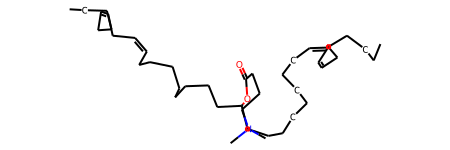

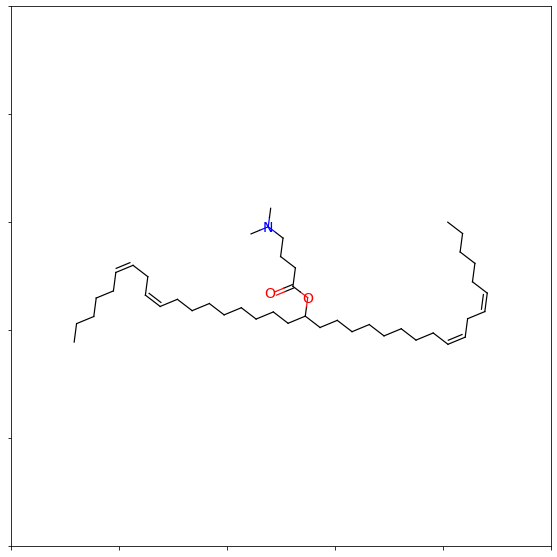

In [3]:
draw_fragment('CCCCC\C=C/C\C=C/CCCCCCCCC(CCCCCCCC\C=C/C\C=C/CCCCC)OC(=O)CCCN(C)C')

In [4]:
os.chdir(main_dir)

In [29]:
#Load atomistic universe
u = md.Universe(GRO)
name='MC3'

resname = np.unique(u.select_atoms('all and not resname TIP3 POPC and not name SOD CLA').resnames)[0]
res = u.select_atoms(f'resname {resname}').resids[0]
sel = u.select_atoms(f'resname {resname} and resid {res}')
sel.atoms.write(f'{name}.pdb')

### Define mapping

In [20]:
#Define manually
#resname = 'DLKC'

N1   = ['N1', 'CN1', 'CN2' ,'HN11' ,'HN12', 'HN13', 'HN21', 'HN22', 'HN23']
CN   = ['C1', 'C2' ,'H11', 'H12', 'H21', 'H22'] 
GLA  = ['C3', 'C4', 'O1', 'O2', 'H31', 'H32']
CX   = ['C5', 'C11', 'C21', 'H5', 'H11R', 'H11S', 'H21R', 'H21S']
C1A  = ['C12', 'C13', 'C14', 'C15', 'C16', 'H12R', 'H12S', 'H13R', 'H13S', 'H14R', 'H14S','H15R','H15S','H16R','H16S'] #5
D2A  = ['C17', 'C18', 'C19', 'C110', 'H17R','H17S','H18R','H18S','H19R','H110R'] #double bond 
D3A  = ['C111','C112','C113','C114','H111R','H111S','H112R','H113R','H114R','H114S'] #double bond
C4A  = ['C115','C116','C117','C118','H115R','H115S','H116R','H116S','H117R','H117S','H118R','H118S','H118T']
C1B  = ['C22','C23','C24','C25','C26','H22R','H22S','H23R','H23S','H24R','H24S','H25R','H25S','H26R','H26S'] #5
D2B  = ['C27', 'C28','C29','C210','H27R','H27S','H28R','H28S','H29R','H210R'] #Double bond
D3B  = ['C211','C212','C213','C214','H211R','H211S','H212R','H213R','H214R','H214S'] #double bond
C4B  = ['C215','C216','C217','C218','H215R','H215S','H216R','H216S','H217R','H218R','H218S','H218T']

bead_assignments = [N1,     CN,      GLA,   CX,      C1A,    D2A,     D3A,   C4A,   C1B,    D2B,    D3B,    C4B]
bead_types       = ['TN3a', 'TC3', 'SN4a', 'TC5',   'C1',  'C4h',   'C4h',  'C1',  'C1',   'C4h',  'C4h' , 'C1']
bead_names       = ['N1',   'CN',  'GLA',  'CX',   'C1A',  'D2A',   'D3A', 'C4A',  'C1B',  'D2B', 'D3B',  'C4B']
bead_sizes       = ['T',     'T',   'S',    'T',    'R',    'R',     'R',    'R',   'R',   'R',    'R',   'R']
bead_charges     = [0,        0,     0,      0,      0,       0,      0,      0,     0,     0,       0,     0]

In [21]:
ndx = open('mapping.ndx' , 'w')

for idx, bead in enumerate(bead_assignments):
    atoms = ' '.join(i for i in bead)
    ndx.write(f'[{bead_names[idx]}]\n')
    ndx.write(f'{atoms}\n')
ndx.close()

In [30]:
def write_mapping (GRO, name, bead_assignments):
    u = md.Universe(GRO)

    resname = np.unique(u.select_atoms('all and not resname TIP3 POPC and not name SOD CLA').resnames)[0]
    res = u.select_atoms(f'resname {resname}').resids[0]
    sel = u.select_atoms(f'resname {resname} and resid {res}')
    sel.atoms.write(f'{name}.pdb')

    ndx = open('mapping.ndx' , 'w')

    for idx, bead in enumerate(bead_assignments):
        atoms = ' '.join(i for i in bead)
        ndx.write(f'[{bead_names[idx]}]\n')
        ndx.write(f'{atoms}\n')
    ndx.close()
    return

write_mapping (GRO, 'MC3', bead_assignments)

### Define angles, bonds, and possible dihedrals

In [ ]:
#define manually
ang_tgts =  [['N1','CN','GLA'],
             ['CN','GLA','CX'],
             ['GLA','CX','C1B'],
             ['GLA','CX','C1A'],
             ['C1A','CX','C1B'],
             ['CX','C1A','D2A'],
             ['CX','C1B','D2B'],
             ['C1A', 'D2A', 'D3A'],
             ['D2A', 'D3A', 'C4A'],
             ['C1B', 'D2B', 'D3B'],
             ['D2B', 'D3B', 'C4B'],
            ]

List_angles = [[0],
              [1],
              [2,3],
              [4],
              [5,6],[7,9],
              [8,10]]

dist_tgts =[
           ['N1', 'CN'],
           ['CN', 'GLA'],
           ['GLA', 'CX'],
           ['CX', 'C1A'],
           ['CX', 'C1B'],
           ['C1A','C1B'],
    
           ['C1B', 'D2B'],
           ['D2B', 'D3B'],
           ['D3B', 'C4B'],
           ['C1A', 'D2A'],
           ['D2A', 'D3A'],
           ['D3A', 'C4B'],
           ]
D_ang, D_bond = make_angle_bond_dicts(ang_tgts, dist_tgts, bead_names)

bins_angl = np.arange(-1,181,2)
bins_dist = np.arange(0,15,0.2)

bins_angl_x = (bins_angl[1:] + bins_angl[:-1]) / 2
bins_dist_x = (bins_dist[1:] + bins_dist[:-1]) / 2



List_bonds =[[0],
            [1],
            [2],
            [3,4],
            [5],
            [6,9], [7,10], [8,11]]

In [ ]:
#Make AA sims whole for later 
#os.system('echo 0 | gmx trjconv -s {} -f {} -pbc whole -o AA_whole.xtc'.format(TPR, XTC))

## map from aa to cg

In [ ]:
map_aa2cg(u, resname, bead_assignments, bead_names, bead_sizes, 'AA_whole.xtc', GRO)

### initial SASA

In [ ]:
CG  = ['cg_good.gro', #GRO
       'cg.xtc']      #XTC
AA = [GRO,'AA_whole.xtc']

In [ ]:
os.chdir(main_dir)
run_SASA('CG', CG, resname, main_dir, bead_names, bead_sizes)

In [ ]:
os.chdir(main_dir)
run_SASA('AA', AA, resname, main_dir, bead_names, bead_sizes)

In [ ]:
CG_xvg = '{}/CG/resarea_SASA.xvg'.format(main_dir)
AA_xvg = '{}/AA/resarea_SASA.xvg'.format(main_dir)

SASA_CG, SASA_AA =  plot_SASA(AA_xvg, CG_xvg, resname)
plt.savefig('{}/SASA_Mapped.png'.format(main_dir), dpi=300, bbox_inches='tight')

## CG in water w. 0.15 M NaCl

In [ ]:
#os.mkdir('CG_WAT')
os.chdir(main_dir)
os.chdir('CG_WAT')
#os.system('cp ../cg_good.gro .') 

### write an initial itp CG

In [ ]:
# #Write an initial CG itp file. You will of course need to set bond lengt, angles and so forth, but the rest is there
#write_initial_CGitp (resname, bead_names, bead_sizes, bead_types, bead_charges, D_bond, D_ang)

In [ ]:
re_run(resname, mdp_loc)

In [ ]:
#!gmx mdrun -v -deffnm r -nt 5 -pin on -pinoffset 20 -pinstride 1
!gmx grompp -f /data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/MDPs/run.mdp -c r.gro -p topol.top -o p.tpr
!gmx mdrun -v -deffnm p -nt 5 -pin on -pinoffset 20 -pinstride 1

#### Setup sydtem and run for a small period of time

In [ ]:
#prepare_setup_water(mdp_loc)

### Measure bonded parameters

this is iterative. There is a re_run fucntion, to use for when you have optimized the parameters

In [ ]:
###Correct for the PBC
p = subprocess.Popen('gmx trjconv -f p.xtc -s p.tpr -o pbc.gro -pbc mol -b 0 -e 0'
                         , stdin=subprocess.PIPE, shell=True, universal_newlines=True)
p.communicate('MC3')
p.wait()
###Correct for the PBC
p = subprocess.Popen('gmx trjconv -f p.xtc -s p.tpr -o pbc.xtc -pbc mol'
                     , stdin=subprocess.PIPE, shell=True, universal_newlines=True)
p.communicate('MC3')
p.wait()

In [ ]:
os.chdir(main_dir)
os.chdir('CG_WAT')
## Open AA   
u_aa = md.Universe('../cg_good.gro',
                   '../cg.xtc')

## Open CG
u_cg = md.Universe('pbc.gro', 'pbc.xtc')

## Fragment 
u_fr = md.Universe('{}/pbc.gro'.format(fragmet_dir), '{}/pbc.xtc'.format(fragmet_dir)) 

Give the angles and bonds for the fragment here to check

In [ ]:
ang_tgts_frag =  [['N1','CN','GLA'],
             ['CN','GLA','CX'],
             ['GLA','CX','C1B'],
             ['GLA','CX','C1A'],
            ]

dist_tgts_frag =[
           ['N1', 'CN'],
           ['CN', 'GLA'],
           ['GLA', 'CX'],
           ['CX', 'C1A'],
           ['CX', 'C1B'],
           ['C1A','C1B'] #Control the triangle in the branching
           ]


In [ ]:
ang_hist_fr, dist_hist_fr, ang_fr, dist_fr= measure_bonded_terms_simple(dist_tgts_frag, ang_tgts_frag,  u_fr, bead_names, 'LIG', 'AA', stride=10)

In [ ]:
ang_hist_aa, dist_hist_aa, ang_aa, dist_aa= measure_bonded_terms_simple(dist_tgts, ang_tgts,  u_aa, bead_names, resname, 'AA', stride=10)

In [ ]:
ang_hist_cg, dist_hist_cg, ang_cg, dist_cg = measure_bonded_terms_simple(dist_tgts, ang_tgts, u_cg, bead_names, resname, 'CG', stride=10)

In [ ]:
for bond in List_bonds:
    try:
        HAAF,BAAF = np.histogram(np.array(dist_fr)[bond,:], bins=bins_dist, normed=True)
        HAA,BAA = np.histogram(np.array(dist_aa)[bond,:], bins=bins_dist, normed=True)
        HCG,BCG = np.histogram(np.array(dist_cg)[bond,:], bins=bins_dist, normed=True)

        plt.plot(bins_dist_x, HAAF, label='Fragment', linewidth=3, linestyle='--')
        plt.plot(bins_dist_x, HAA, label='AA', color='green')
        plt.plot(bins_dist_x, HCG, label='CG', color='orange')
    except:
        HAA,BAA = np.histogram(np.array(dist_aa)[bond,:], bins=bins_dist, normed=True)
        HCG,BCG = np.histogram(np.array(dist_cg)[bond,:], bins=bins_dist, normed=True)

        plt.plot(bins_dist_x, HAA, label='AA', color='green')
        plt.plot(bins_dist_x, HCG, label='CG', color='orange')

    title = ' '.join(i for i in dist_tgts[bond[0]])
    plt.title(title) 
    plt.xlabel('Bond (nm)')
    plt.ylabel('Probability density')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
    #plt.savefig('{}_water_bond.png'.format(title), dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
for angle in List_angles:
    try:
        HAAF,BAAF = np.histogram(np.array(ang_fr)[angle,:], bins=bins_angl, normed=True)
        HAA,BAA = np.histogram(np.array(ang_aa)[angle,:], bins=bins_angl, normed=True)
        HCG,BCG = np.histogram(np.array(ang_cg)[angle,:], bins=bins_angl, normed=True)

        plt.plot(bins_angl_x, HAAF, label='Fragment',linewidth=3, linestyle='--')
        plt.plot(bins_angl_x, HAA, label='AA', color='green')
        plt.plot(bins_angl_x, HCG, label='CG')
    except:
        HAA,BAA = np.histogram(np.array(ang_aa)[angle,:], bins=bins_angl, normed=True)
        HCG,BCG = np.histogram(np.array(ang_cg)[angle,:], bins=bins_angl, normed=True)

        plt.plot(bins_angl_x, HAA, label='AA', color='green')
        plt.plot(bins_angl_x, HCG, label='CG', color='orange')
    title = ' '.join(i for i in ang_tgts[angle[0]])
    plt.title(title) 
    plt.xlabel('Angle (°)')
    plt.ylabel('Probability density')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
    plt.savefig('{}_water_angle.png'.format(title), dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
#measure_ang_dist (dist_tgts, ang_tgts, u_aa, u_cg, bead_names, resname, 'MC3')

re_run(resname, mdp_loc, maxwarn=5)

#### you can optimize the bonded parameters now and then re-run. 
Remember to check SASA as well

In [ ]:
cg_dir =  os.getcwd()

os.chdir(cg_dir)

CG  = ['p.gro', #GRO
       'p.xtc'] #XTX

run_SASA('CG_SASA', CG, 'DLMC3', cg_dir, bead_names, bead_sizes)

CG_xvg = '{}/CG_WAT/CG_SASA/resarea_SASA.xvg'.format(main_dir)
AA_xvg = '{}/AA/resarea_SASA.xvg'.format(main_dir)
plot_SASA(AA_xvg, CG_xvg, resname)

## BL

In [ ]:
os.chdir(main_dir)
#os.mkdir('CG_BL')
os.chdir('CG_BL')

# os.system('cp ../CG_WAT/initial_CG.itp .')

# os.system('python2 /data1/lisbeth/PYTHON/insane.py -l MC3:30 -l POPC:70 -pbc cubic -x 5 -y 5 -z 10 -sol W -o mem.gro -p topol.top')

# os.system("sed -i 's/{}/MC3/g' initial_CG.itp".format(resname))

# prepare_setup_BL('initial_CG.itp', mdp_loc_BL)


#re_run_BL('MC3', lipids='POPC MC3')

In [ ]:
re_run_BL('MC3', lipids='POPC MC3')

In [ ]:
###Correct for the PBC
p = subprocess.Popen('gmx trjconv -f p.xtc -s p.tpr -o pbc.gro -pbc mol -b 0 -e 0'
                         , stdin=subprocess.PIPE, shell=True, universal_newlines=True)
p.communicate('MC3')
p.wait()
###Correct for the PBC
p = subprocess.Popen('gmx trjconv -f p.xtc -s p.tpr -o pbc.xtc -pbc mol'
                     , stdin=subprocess.PIPE, shell=True, universal_newlines=True)
p.communicate('MC3')
p.wait()

In [ ]:
os.chdir('{}/CG_BL'.format(main_dir))
## Open AA   
u_aa = md.Universe('{}/cg_good.gro'.format(main_dir),
                   '{}/cg.xtc'.format(main_dir))

## Open CG
#os.system("sed -i 's/MC3/{}/g' p.gro'".format(resname))
u_cg = md.Universe('pbc.gro', 'pbc.xtc')

## Fragment 
u_fr = md.Universe('{}/pbc.gro'.format(fragmet_dir), '{}/pbc.xtc'.format(fragmet_dir)) 

In [ ]:
ang_hist_fr, dist_hist_fr, ang_fr, dist_fr= measure_bonded_terms_simple(dist_tgts_frag, ang_tgts_frag,  u_fr, bead_names, 'LIG', 'AA', stride=5)

In [ ]:
ang_hist_aa, dist_hist_aa, ang_aa, dist_aa= measure_bonded_terms_simple(dist_tgts, ang_tgts,  u_aa, bead_names, resname, 'AA', stride=10)

In [ ]:
ang_hist_cg, dist_hist_cg, ang_cg, dist_cg = measure_bonded_terms_simple(dist_tgts, ang_tgts, u_cg, bead_names, 'MC3', 'CG', stride=10)

In [ ]:
for bond in List_bonds:
    try:
        HAAF,BAAF = np.histogram(np.array(dist_fr)[bond,:], bins=bins_dist, normed=True)
        HAA,BAA = np.histogram(np.array(dist_aa)[bond,:], bins=bins_dist, normed=True)
        HCG,BCG = np.histogram(np.array(dist_cg)[bond,:], bins=bins_dist, normed=True)

        plt.plot(bins_dist_x, HAAF, label='Fragment', linewidth=3, linestyle='--')
        plt.plot(bins_dist_x, HAA, label='AA', color='green')
        plt.plot(bins_dist_x, HCG, label='CG', color='orange')
    except:
        HAA,BAA = np.histogram(np.array(dist_aa)[bond,:], bins=bins_dist, normed=True)
        HCG,BCG = np.histogram(np.array(dist_cg)[bond,:], bins=bins_dist, normed=True)

    plt.plot(bins_dist_x, HAA, label='AA', color='green')
    plt.plot(bins_dist_x, HCG, label='CG', color='orange')

    title = ' '.join(i for i in dist_tgts[bond[0]])
    plt.title(title) 
    plt.xlabel('Bond (nm)')
    plt.ylabel('Probability density')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
    plt.savefig('{}_BL_bond.png'.format(title), dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
for angle in List_angles:
    try:
        HAAF,BAAF = np.histogram(np.array(ang_fr)[angle,:], bins=bins_angl, normed=True)
        HAA,BAA = np.histogram(np.array(ang_aa)[angle,:], bins=bins_angl, normed=True)
        HCG,BCG = np.histogram(np.array(ang_cg)[angle,:], bins=bins_angl, normed=True)

        plt.plot(bins_angl_x, HAAF, label='Fragment',linewidth=3, linestyle='--')
        plt.plot(bins_angl_x, HAA, label='AA', color='green')
        plt.plot(bins_angl_x, HCG, label='CG')
    except:
        HAA,BAA = np.histogram(np.array(ang_aa)[angle,:], bins=bins_angl, normed=True)
        HCG,BCG = np.histogram(np.array(ang_cg)[angle,:], bins=bins_angl, normed=True)

    plt.plot(bins_angl_x, HAA, label='AA', color='green')
    plt.plot(bins_angl_x, HCG, label='CG', color='orange')
    title = ' '.join(i for i in ang_tgts[angle[0]])
    plt.title(title) 
    plt.xlabel('Angle (°)')
    plt.ylabel('Probability density')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
    plt.savefig('{}_BL_angle.png'.format(title), dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
def align_everything(GRO, XTC, TPR):
    frame = 'name C1 C3 C4'
    ref_ats = mda.Universe(GRO).select_atoms('resname AGLCA').residues[0].atoms.select_atoms(frame).indices
    print(ref_ats)
    # ref_ats = [9, 0, 2]   ## sometimes doesnt match the above selection. do check.
    ref = mda.Merge(mda.Universe(GRO).select_atoms('resname AGLCA').residues[0].atoms)
    ref_sel = ref.atoms.select_atoms(frame)    ### Frame for the virtual site stuff

    u = mda.Universe(TPR, XTC)
    chols = u.select_atoms('resname AGLCA').residues

    ### Write aligned trajectory
    aligned_traj = mda.Writer('aligned_aa.xtc', n_atoms=len(ref.atoms))
    for frame in tqdm(u.trajectory):
        for chol in chols.atoms.fragments:
            mobile = mda.Merge(chol)
            align.alignto(mobile.atoms[ref_ats], ref_sel)
            aligned_traj.write(mobile.atoms)
    aligned_traj.close()
    chol.atoms.write('chol_aa.gro')

    ### Write averaged structure
    aligned = mda.Universe('chol_aa.gro', 'aligned_aa.xtc')
    allpos = np.empty((len(aligned.trajectory), len(aligned.atoms), 3), dtype=np.float32)
    for i, frame in tqdm(enumerate(aligned.trajectory), total=len(aligned.trajectory)):
        allpos[i] = frame.positions
    averaged = allpos.mean(axis=0)
    mobile.atoms.positions = averaged
    mobile.atoms.write('averaged_aa.gro')

In [ ]:
cg_dir =  os.getcwd()

os.chdir(cg_dir)

CG  = ['pbc.gro', #GRO
       'pbc.xtc'] #XTX

run_SASA('CG_SASA', CG, 'MC3', cg_dir, bead_names, bead_sizes)

AA_xvg = '{}/AA/resarea_SASA.xvg'.format(main_dir)
CG_xvg = '{}/CG_BL/CG_SASA/resarea_SASA.xvg'.format(main_dir)
plot_SASA(AA_xvg, CG_xvg, resname)
plt.savefig('{}/SASA.png'.format('CG_SASA'), dpi=300, bbox_inches='tight')